# Project 2 - Classification
## Predict customers likely to respond to a marketing campaign
### This notebook uses the *campaign.xlsx* dataset

(c) Nuno António 2022 - Rev. 1.0

## Dataset description

- **AcceptedCmp1** - 1 if customer accepted the offer in the 1st campaign, 0 otherwise 
- **AcceptedCmp2** - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise 
- **AcceptedCmp3** - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise 
- **AcceptedCmp4** - 1 if customer accepted the offer in the 4th campaign, 0 otherwise 
- **AcceptedCmp5** - 1 if customer accepted the offer in the 5th campaign, 0 otherwise 
- **Response (target)** - 1 if customer accepted the offer in the last campaign, 0 otherwise 
- **Complain** - 1 if customer complained in the last 2 years
- **DtCustomer** - date of customer’s enrolment with the company
- **Education** - customer’s level of education
- **Marital** - customer’s marital status
- **Kidhome** - number of small children in customer’s household
- **Teenhome** - number of teenagers in customer’s household
- **Income** - customer’s yearly household income
- **MntFishProducts** - amount spent on fish products in the last 2 years
- **MntMeatProducts** - amount spent on meat products in the last 2 years
- **MntFruits** - amount spent on fruits products in the last 2 years
- **MntSweetProducts** - amount spent on sweet products in the last 2 years
- **MntWines** - amount spent on wine products in the last 2 years
- **MntGoldProds** - amount spent on gold products in the last 2 years
- **NumDealsPurchases** - number of purchases made with discount
- **NumCatalogPurchases** - number of purchases made using catalogue
- **NumStorePurchases** - number of purchases made directly in stores
- **NumWebPurchases** - number of purchases made through company’s web site
- **NumWebVisitsMonth** - number of visits to company’s web site in the last month
- **Recency** - number of days since the last purchase

## Initializations and data loading

In [59]:
# Installing the necessary packages:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #visualizations


In [60]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import collections
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.model_selection import RFECV
from sklearn.model_selection import GridSearchCV
from yellowbrick.model_selection import LearningCurve

In [61]:
# Formating that will be applied in all of the notebook
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 15
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 12
heatmaps_text_fontSize = 12

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

# increase the number of columns to display
pd.set_option('display.max_columns', 500)

In [62]:
# Loading the dataset: 
ds = pd.read_parquet('oneHotEncoded.parquet.snappy')
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,1967.0,52109.792069,21157.456610,2447.0,35661.500000,51766.000000,68557.000000,160803.000000
Recency,1967.0,48.945602,28.957973,0.0,24.000000,49.000000,74.000000,99.000000
NumDealsPurchases,1967.0,2.324860,1.880377,0.0,1.000000,2.000000,3.000000,15.000000
NumWebVisitsMonth,1967.0,5.299441,2.359008,0.0,3.000000,6.000000,7.000000,20.000000
AcceptedCmp3,1967.0,0.076258,0.265478,0.0,0.000000,0.000000,0.000000,1.000000
AcceptedCmp4,1967.0,0.077275,0.267095,0.0,0.000000,0.000000,0.000000,1.000000
AcceptedCmp5,1967.0,0.071683,0.258028,0.0,0.000000,0.000000,0.000000,1.000000
AcceptedCmp1,1967.0,0.066599,0.249389,0.0,0.000000,0.000000,0.000000,1.000000
AcceptedCmp2,1967.0,0.013218,0.114237,0.0,0.000000,0.000000,0.000000,1.000000
Complain,1967.0,0.009659,0.097831,0.0,0.000000,0.000000,0.000000,1.000000


## Modeling - NB

#### Data preparation

In [63]:
# Create a modeling dataset from the original dataset
X = ds.copy(deep=True)

In [64]:
X.head()

,Income,Recency,NumDealsPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Lifetime,TotalMnt,PercentMntWines,PercentMntFruits,PercentMntMeatProducts,PercentMntFishProducts,PercentMntSweetProducts,PercentMntGoldProds,Frequency,PercentageWebPurchases,PercentageStorePurchases,PercentageCatalogPurchases,PercentageDealsPurchases,AvgTimeBetweenTransaction,AvgWebPurchases,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Kidhome_0,Kidhome_1,Teenhome_0,Teenhome_1
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,58138,58,3,7,0,0,0,0,0,0,1,57,663.0,1617,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,22,0.363636,0.181818,0.454545,0.136364,30.136364,1.142857,0,0,1,0,0,0,0,1,0,0,1,0,1,0
1,46344,38,2,5,0,0,0,0,0,0,0,60,113.0,27,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222,4,0.250000,0.500000,0.250000,0.500000,28.250000,0.200000,0,0,1,0,0,0,0,1,0,0,0,1,0,1
2,71613,26,1,4,0,0,0,0,0,0,0,49,312.0,776,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124,20,0.400000,0.500000,0.100000,0.050000,15.600000,2.000000,0,0,1,0,0,0,0,0,1,0,1,0,1,0
3,26646,26,2,6,0,0,0,0,0,0,0,30,139.0,53,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340,6,0.333333,0.666667,0.000000,0.333333,23.166667,0.333333,0,0,1,0,0,0,0,0,1,0,0,1,1,0
4,58293,94,5,5,0,0,0,0,0,0,0,33,161.0,422,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545,14,0.357143,0.428571,0.214286,0.357143,11.500000,1.000000,0,0,0,0,1,0,1,0,0,0,0,1,1,0


In [65]:
# Create the Target
y = X['Response']

In [66]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=123)

We have an issue with AvgWebPurchases, even if it doesn't contain infinite because we removed on the eda notebook it doesn't work with the sklearn algorithm. So we need to drop this feature.  
Since this model is susceptible to high correlated variables we tried to remove TotalMnt, Income and Frequency that are correlated between each other and without TotalMnt the model is going better.

In [67]:
toDrop = ['Response', 'AvgWebPurchases','TotalMnt']

In [68]:
# Remove the Target from the training
X_train = X_train.drop(toDrop,axis=1)
X_test = X_test.drop(toDrop,axis=1)

In [69]:
# Dataframe for scaling
tempDF = X.copy(deep=True)
tempDF.drop(columns=toDrop, inplace=True)

# Normalize training/test data
scaler = MinMaxScaler(feature_range=(0, 1))
tempDF_scaled = scaler.fit_transform(tempDF)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

With var smoothing we are changing the shape of the gaussian curve.

In [70]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=3, n_jobs=-1, scoring='roc_auc')

grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='roc_auc', verbose=3)

In [71]:
print(grid.best_params_)

{'var_smoothing': 1e-09}


In [72]:
classModel = GaussianNB(**grid.best_params_)
classModel.fit(X_train_scaled,y_train)

GaussianNB()

In [73]:
# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train_scaled) 
y_pred_test = classModel.predict(X_test_scaled) 

In [74]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain),
                metricsObj.f1_score(yTrain, yPredTrain),
                metricsObj.roc_auc_score(yTrain, yPredTrain)
                ]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest),
               metricsObj.f1_score(yTest, yPredTest),
               metricsObj.roc_auc_score(yTest, yPredTest)
               ]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [75]:
# Function to plot confusion matrix - Adapted from https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

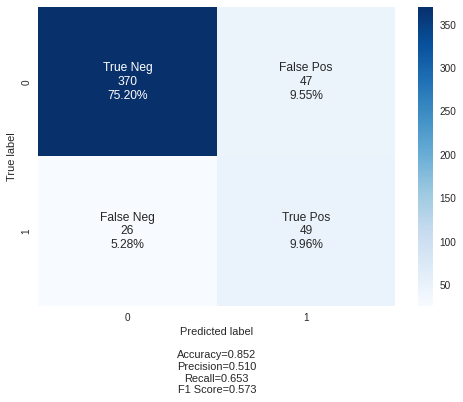

In [76]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [77]:
resultsDF = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.827119,0.851626
1,PRECISION,0.449324,0.510417
2,RECALL,0.591111,0.653333
3,F1 SCORE,0.510557,0.573099
4,AUC,0.730356,0.770312


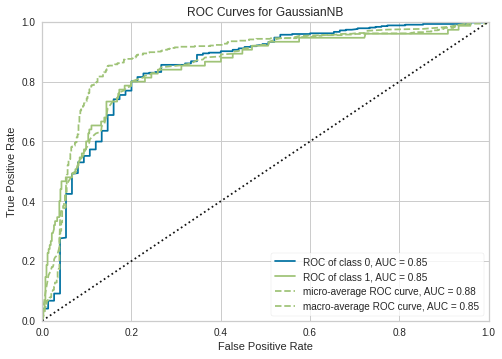

<AxesSubplot:title={'center':'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [78]:
# ROC curve
visualizer = ROCAUC(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

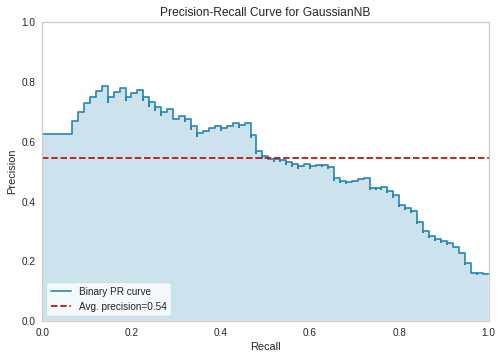

<AxesSubplot:title={'center':'Precision-Recall Curve for GaussianNB'}, xlabel='Recall', ylabel='Precision'>

In [79]:
# Precison-Recall curve
visualizer = PrecisionRecallCurve(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

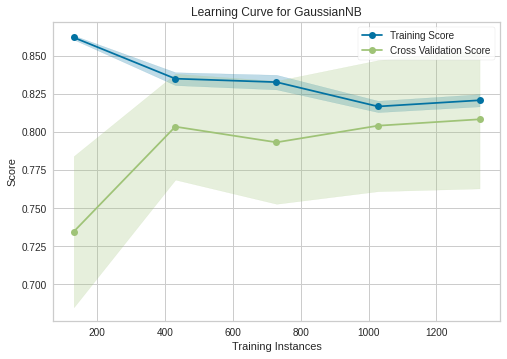

<AxesSubplot:title={'center':'Learning Curve for GaussianNB'}, xlabel='Training Instances', ylabel='Score'>

In [80]:
# Plot the learning curve
cv = 10
visualizer = LearningCurve(estimator=classModel, cv=cv, scoring='roc_auc', n_jobs=-1, random_state=123)
visualizer.fit(X_train_scaled, y_train)
visualizer.show()

Counter({0: 1250, 1: 225})


<AxesSubplot:xlabel='Response', ylabel='count'>

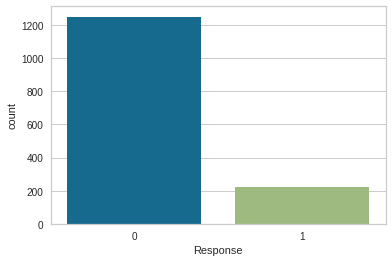

In [81]:
# Display target balance in the training dataset
print(collections.Counter(y_train))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Response", data=pd.DataFrame(data={'Response':y_train}), ax=ax)

Counter({1: 1250, 0: 1250})


<AxesSubplot:xlabel='Response', ylabel='count'>

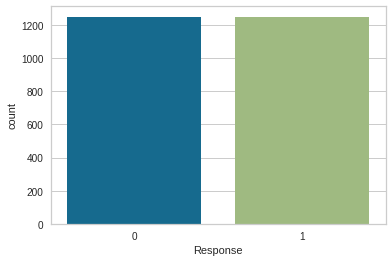

In [82]:
# Import package
from imblearn.over_sampling import SMOTE

# Applyting SMOTE to generare new instances (oversampling)
sm = SMOTE(random_state=123, sampling_strategy=1.0)
X_train_scaled2, y_train2 = sm.fit_resample(X_train_scaled, y_train)

# Display target balance in the training dataset
print(collections.Counter(y_train2))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Response", data=pd.DataFrame(data={'Response':y_train2}), ax=ax)

In [83]:
# Train de model
classModel.fit(X_train_scaled2, y_train2)

# Predict values
# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train_scaled2) 
y_pred_test = classModel.predict(X_test_scaled) 

# Show performance results
resultsDF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.758800,0.796748
1,PRECISION,0.788068,0.407407
2,RECALL,0.708000,0.733333
3,F1 SCORE,0.745891,0.523810
4,AUC,0.758800,0.770743


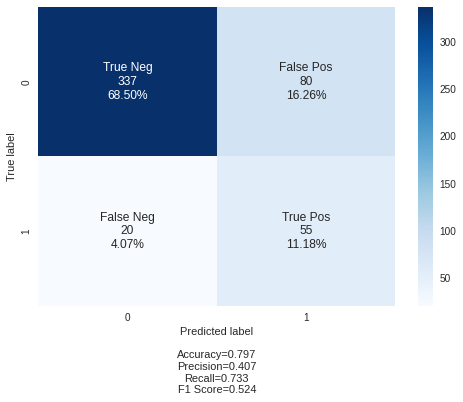

In [84]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

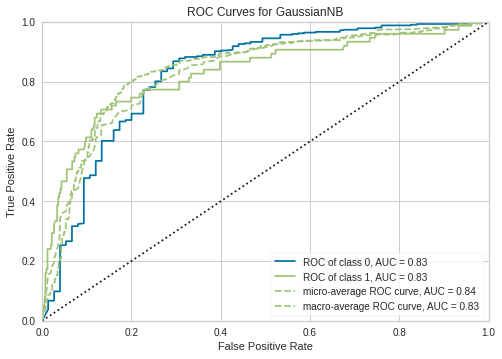

<AxesSubplot:title={'center':'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [85]:
# ROC curve
visualizer = ROCAUC(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled2, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

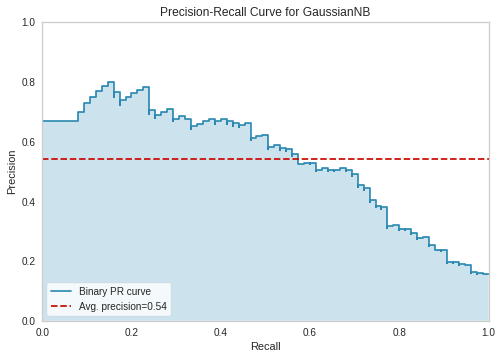

<AxesSubplot:title={'center':'Precision-Recall Curve for GaussianNB'}, xlabel='Recall', ylabel='Precision'>

In [86]:
# Precison-Recall curve
visualizer = PrecisionRecallCurve(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled2, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

/home/tosk/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/tosk/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/tosk/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'GaussianNB' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/tosk/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/tosk/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.p

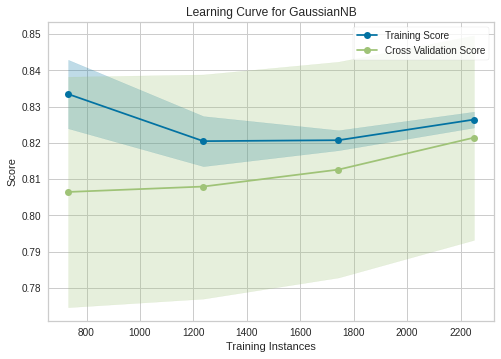

<AxesSubplot:title={'center':'Learning Curve for GaussianNB'}, xlabel='Training Instances', ylabel='Score'>

In [87]:
# Plot the learning curve
cv = 10
visualizer = LearningCurve(estimator=classModel, cv=cv, scoring='roc_auc', n_jobs=-1, random_state=123)
visualizer.fit(X_train_scaled2, y_train2)
visualizer.show()